In [ ]:
import os
import shutil
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/07project/training_examples.csv')
df

,PDB ID,SMILES,is_active
0,2NNQ,CCCn1c2c(c3c1c(ccc3)C(=O)O)CCCCC2,1
1,2NNQ,c1ccc(cc1)Cn2c3c(c4c2c(ccc4)C(=O)O)CCCC3,1
2,2NNQ,c1cc(cc(c1)F)Cn2c3c(c4c2c(ccc4)C(=O)O)CCCC3,1
3,2NNQ,Cn1c(c(nc1c2ccccc2c3cccc(c3)NCC(=O)O)c4ccccc4)...,1
4,2NNQ,c1ccc(c(c1)Cn2c3c(c4c2c(ccc4)C(=O)O)CCCC3)C(F)...,1
...,...,...,...
1035881,1LI4,CCC[C@@](C)(C(=O)[O-])NC(=O)C(C)(C)[NH3+],0
1035882,1LI4,c1cc(c(cc1[N+](=O)[O-])C(=O)N)NCC(=O)[O-],0
1035883,1LI4,c1cc(sc1)CNC(=O)c2cc3c(=O)[nH]c(nc3nc2)[O-],0
1035884,1LI4,Cc1cc([nH]n1)C(=O)Nc2ccc3c(c2)[nH]c(=O)[nH]3,0


In [ ]:
df['is_active'].value_counts()

0    1019097
1      16789
Name: is_active, dtype: int64

In [ ]:
df1 = df[df['is_active'] == 0]
df1.reset_index(drop=True, inplace =True)
df1

,PDB ID,SMILES,is_active
0,2NNQ,Cc1cc(c(c(c1OCC(C)(C)C(=O)[O-])C)C)Br,0
1,2NNQ,CCCCN1[C@@H](C(=C(C1=O)[O-])C(=O)c2ccc(c(c2)C)...,0
2,2NNQ,Cc1ccc(cc1)COc2ccc(cc2)C(=O)C3=C(C(=O)N([C@@H]...,0
3,2NNQ,C[C@@H]1CC[C@@H]([C@@H](C1)OCC2CCCCC2)C(=O)[O-],0
4,2NNQ,CCCCN1[C@@H](C(=C(C1=O)[O-])C(=O)c2ccc(cc2)OCC...,0
...,...,...,...
1019092,1LI4,CCC[C@@](C)(C(=O)[O-])NC(=O)C(C)(C)[NH3+],0
1019093,1LI4,c1cc(c(cc1[N+](=O)[O-])C(=O)N)NCC(=O)[O-],0
1019094,1LI4,c1cc(sc1)CNC(=O)c2cc3c(=O)[nH]c(nc3nc2)[O-],0
1019095,1LI4,Cc1cc([nH]n1)C(=O)Nc2ccc3c(c2)[nH]c(=O)[nH]3,0


In [ ]:
df2 = df[df['is_active'] == 1]
df2.reset_index(drop=True, inplace =True)
df2

,PDB ID,SMILES,is_active
0,2NNQ,CCCn1c2c(c3c1c(ccc3)C(=O)O)CCCCC2,1
1,2NNQ,c1ccc(cc1)Cn2c3c(c4c2c(ccc4)C(=O)O)CCCC3,1
2,2NNQ,c1cc(cc(c1)F)Cn2c3c(c4c2c(ccc4)C(=O)O)CCCC3,1
3,2NNQ,Cn1c(c(nc1c2ccccc2c3cccc(c3)NCC(=O)O)c4ccccc4)...,1
4,2NNQ,c1ccc(c(c1)Cn2c3c(c4c2c(ccc4)C(=O)O)CCCC3)C(F)...,1
...,...,...,...
16784,1LI4,C=C[C@H]1C[C@H]([C@@H]([C@@H]1O)O)n2cnc3c2ncnc3N,1
16785,1LI4,c1nc(c2c(n1)n(cn2)C3[C@H]([C@H]([C@@H](O3)/C=N...,1
16786,1LI4,c1nc(c2c(n1)n(cn2)C3[C@@H]([C@@H]([C@H](O3)CF)...,1
16787,1LI4,c1nc(c2c(n1)n(cn2)CC=C(CO)CO)N,1


In [ ]:
print(1019097/15000)
print(16789/15000)

67.9398
1.1192666666666666


In [ ]:
data_index = []
a = 0
for i in range(15000):
  data_index.append(a)
  a += 67

In [ ]:
df1 = df1.loc[data_index]
df1.reset_index(drop=True, inplace =True)

In [ ]:
df1

,PDB ID,SMILES,is_active
0,2NNQ,Cc1cc(c(c(c1OCC(C)(C)C(=O)[O-])C)C)Br,0
1,2NNQ,c1ccc2c(c1)ccc(n2)c3nnc(n3c4cccc(c4)C(F)(F)F)[S-],0
2,2NNQ,Cc1ccc(c2c1cc(c(n2)Cl)/C=C/C(=O)[O-])C,0
3,2NNQ,Cc1cc(c(c(c1)C)C[C@H](c2c(cc(cc2C)C)C)C(=O)[O-])C,0
4,2NNQ,c1ccc2c(c1)CCN(C2)c3ccc(cc3/N=C/c4cc(ccc4[O-])...,0
...,...,...,...
14995,1SJ0,CC[C@@H](CO)Nc1c(c(=O)n2cccc(c2n1)C)/C=C\3/C(=...,0
14996,1SJ0,CC[NH+]1CCC[C@H]1CN[C@H](c2ccccc2)C(=O)Nc3cc(c...,0
14997,1SJ0,Cc1c2ccccc2sc1[C@H]3CC(=O)Nc4c3c(nn4C)C5CC5,0
14998,1SJ0,Cc1ccc(cc1)Sc2ccc(cc2N)F,0


In [ ]:
df2 = df2.loc[0:14999]
df2

,PDB ID,SMILES,is_active
0,2NNQ,CCCn1c2c(c3c1c(ccc3)C(=O)O)CCCCC2,1
1,2NNQ,c1ccc(cc1)Cn2c3c(c4c2c(ccc4)C(=O)O)CCCC3,1
2,2NNQ,c1cc(cc(c1)F)Cn2c3c(c4c2c(ccc4)C(=O)O)CCCC3,1
3,2NNQ,Cn1c(c(nc1c2ccccc2c3cccc(c3)NCC(=O)O)c4ccccc4)...,1
4,2NNQ,c1ccc(c(c1)Cn2c3c(c4c2c(ccc4)C(=O)O)CCCC3)C(F)...,1
...,...,...,...
14995,3CQW,N[C@H](COc3cncc(c2ccc1cnccc1c2)c3)Cc4n[nH]c5cc...,1
14996,3CQW,CC(C)=c4c(=O)[nH]c5ccc(c3cncc(OC[C@@H](N)Cc1c[...,1
14997,3CQW,Cc5n[nH]c6cnc(c3cc(OC[C@@H](N)Cc1c[nH]c2ccccc1...,1
14998,3CQW,N[C@H](COc3cncc(c2ccc1NC(=O)C(F)(F)c1c2)c3)Cc4...,1


In [ ]:
df = pd.concat([df1,df2], ignore_index=True, axis=0)
df

,PDB ID,SMILES,is_active
0,2NNQ,Cc1cc(c(c(c1OCC(C)(C)C(=O)[O-])C)C)Br,0
1,2NNQ,c1ccc2c(c1)ccc(n2)c3nnc(n3c4cccc(c4)C(F)(F)F)[S-],0
2,2NNQ,Cc1ccc(c2c1cc(c(n2)Cl)/C=C/C(=O)[O-])C,0
3,2NNQ,Cc1cc(c(c(c1)C)C[C@H](c2c(cc(cc2C)C)C)C(=O)[O-])C,0
4,2NNQ,c1ccc2c(c1)CCN(C2)c3ccc(cc3/N=C/c4cc(ccc4[O-])...,0
...,...,...,...
29995,3CQW,N[C@H](COc3cncc(c2ccc1cnccc1c2)c3)Cc4n[nH]c5cc...,1
29996,3CQW,CC(C)=c4c(=O)[nH]c5ccc(c3cncc(OC[C@@H](N)Cc1c[...,1
29997,3CQW,Cc5n[nH]c6cnc(c3cc(OC[C@@H](N)Cc1c[nH]c2ccccc1...,1
29998,3CQW,N[C@H](COc3cncc(c2ccc1NC(=O)C(F)(F)c1c2)c3)Cc4...,1


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df

,PDB ID,SMILES,is_active
0,2VT4,OC(CNCCOc2ccc(n1ccnc1)cc2)CONC(C3CC3)C4CC4,1
1,1ZW5,C(CC(=O)[O-])[C@H](CS)C(=O)[O-],0
2,3FRJ,Cc1cccn2c1nc(c(c2=O)/C=C/3\C(=O)N(C(=S)S3)Cc4c...,0
3,3MAX,Cc1ccc(cc1Cl)Nc2nnc(s2)SCC(=O)Nc3c(ccs3)C(=O)N,0
4,2RGP,C[C@@H]1CCCC[C@H]1[NH2+][C@@H]2c3cc(c(cc3NC2=O...,0
...,...,...,...
29995,2OF2,Cc2ccc(C(=O)Nc1cccc(C(F)(F)F)c1)cc2C#Cc3cnc(N)nc3,1
29996,3EML,c1ccc(cc1)S(=O)(=O)Nc2cccc3c2n[nH]n3,0
29997,3L3M,NC(=O)c3cccc2CN(CC1CCNCC1)C(=O)c23,1
29998,3LAN,CCn1cnc2c(c1=O)c(c(s2)C(=O)Nc3ccc(cc3)O)C,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


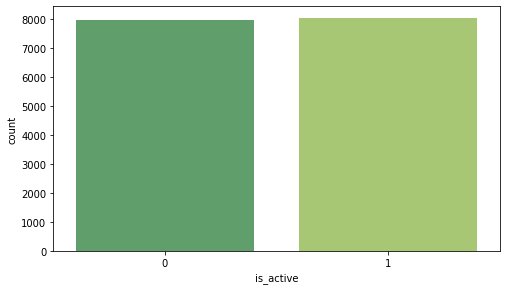

In [ ]:
plt.figure(figsize=(8,4.5))
sns.countplot(df['is_active'][0:16000], palette='summer')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


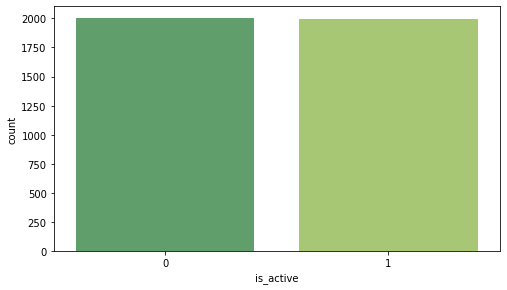

In [ ]:
plt.figure(figsize=(8,4.5))
sns.countplot(df['is_active'][16000:20000], palette='summer')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


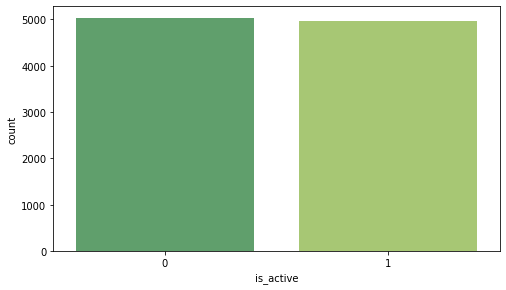

In [ ]:
plt.figure(figsize=(8,4.5))
sns.countplot(df['is_active'][20000:30000], palette='summer')
plt.show()

In [ ]:
df.to_csv('dataset.csv',index=False)